# Drug Classification

##### Exploration of Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drug.csv')

##### Checking the shape of dataframe

In [3]:
df.shape

(200, 6)

In [4]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [6]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [7]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

C:\Users\Lorenz Angelo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Drug', ylabel='count'>

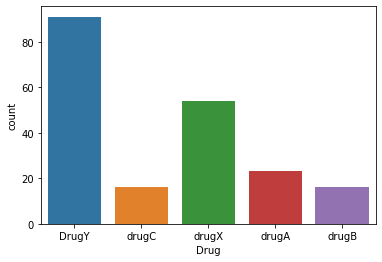

In [8]:
sns.countplot(df['Drug'])

## Data Pre-processing

### Data Cleaning
#### Drop Duplicates

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(200, 6)

#### Filling in Missing Values

In [11]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

##### We can see that the dataset does not have any missing values in any of its features

#### Removing Extreme Values

In [12]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

C:\Users\Lorenz Angelo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na_to_K'>

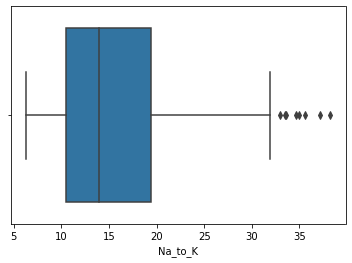

In [13]:
sns.boxplot(df['Na_to_K'])

In [14]:
cols = ['Na_to_K'];
for c in cols:
    q3 = df[c].quantile(.75);
    q1 = df[c].quantile(.25);
    IQR = q3 - q1;
    _max = q3 + (IQR * 1.5);
    _min = q1 - (IQR * 1.5);
    df.loc[df[c] < _min,c] = _min;
    df.loc[df[c] > _max,c] = _max;

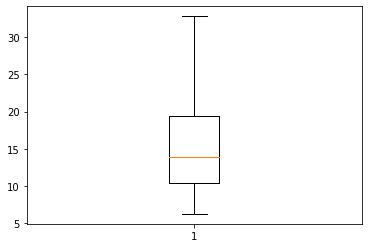

In [15]:
cols = ['Na_to_K'];
for c in cols:
    plt.boxplot(df[c]);

##### We removed the outliers in the feature NA_to_K

### Converting categorical features into numerical features

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder();
df_new = df.copy();

for col in df_new.columns:
    if(col == 'Cholesterol','Drug','BP'):
        df_new[col] = encoder.fit_transform(df_new[col]);

In [17]:
df_new


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,0
1,30,1,1,0,89,3
2,30,1,1,0,43,3
3,12,0,2,0,10,4
4,44,0,1,0,133,0
...,...,...,...,...,...,...
195,39,0,1,0,69,3
196,1,1,1,0,75,3
197,35,1,2,0,36,4
198,8,1,2,1,102,4


In [18]:
df_new.dtypes

Age            int64
Sex            int32
BP             int32
Cholesterol    int32
Na_to_K        int64
Drug           int32
dtype: object

### Data Normalization / Feature Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler();
df_scaled = df_new.copy();

for col in df_scaled.columns:
    df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1));



In [20]:
df_scaled

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.142857,0.0,0.0,0.0,0.878947,0.00
1,0.535714,1.0,0.5,0.0,0.468421,0.75
2,0.535714,1.0,0.5,0.0,0.226316,0.75
3,0.214286,0.0,1.0,0.0,0.052632,1.00
4,0.785714,0.0,0.5,0.0,0.700000,0.00
...,...,...,...,...,...,...
195,0.696429,0.0,0.5,0.0,0.363158,0.75
196,0.017857,1.0,0.5,0.0,0.394737,0.75
197,0.625000,1.0,1.0,0.0,0.189474,1.00
198,0.142857,1.0,1.0,1.0,0.536842,1.00


### Feature Selection / Correlation Analysis

<AxesSubplot:>

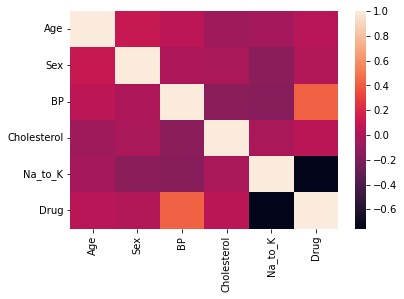

In [21]:
sns.heatmap(df_scaled.corr())

#### There is no correlation between the features therefore we wont be dropping any of the features.

## Modelling

### Split target variable to feature variables

In [22]:
X = df_scaled.drop(['Drug'],axis=1);
y = df_scaled['Drug'];
y=y.astype('int')

### Split our dataset to training and test

In [23]:
from sklearn.model_selection import train_test_split;

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=.70,stratify=y);


###  Choosing the best model

In [24]:
from sklearn.metrics import confusion_matrix;
from sklearn.metrics import plot_roc_curve;
from sklearn.metrics import classification_report;

def evaluate_model(model):
    print(classification_report(y_test,model.predict(X_test)));
    print(confusion_matrix(y_test,model.predict(X_test),labels=[0,1,2,3,4]));
    print('Training score:',model.score(X_train,y_train));
    print('Test score:',model.score(X_test,y_test));
    plot_roc_curve(model,X_test,y_test);

### Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        44
           1       0.85      0.69      0.76        16

    accuracy                           0.88        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.88      0.88      0.88        60

[[42  2  0  0  0]
 [ 5 11  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Training score: 0.9285714285714286
Test score: 0.8833333333333333


C:\Users\Lorenz Angelo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


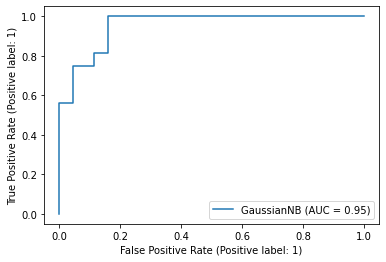

In [25]:
from sklearn.naive_bayes import GaussianNB;

gnb = GaussianNB();
gnb.fit(X_train,y_train);

evaluate_model(gnb)

### BernoulliNB

              precision    recall  f1-score   support

           0       0.76      0.95      0.85        44
           1       0.60      0.19      0.29        16

    accuracy                           0.75        60
   macro avg       0.68      0.57      0.57        60
weighted avg       0.72      0.75      0.70        60

[[42  2  0  0  0]
 [13  3  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Training score: 0.7571428571428571
Test score: 0.75


C:\Users\Lorenz Angelo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


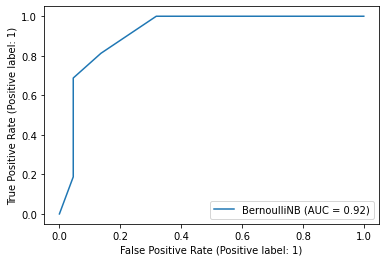

In [26]:
from sklearn.naive_bayes import BernoulliNB;

bnb = BernoulliNB();
bnb.fit(X_train,y_train);

evaluate_model(bnb)

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        16

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[44  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Training score: 1.0
Test score: 1.0


C:\Users\Lorenz Angelo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


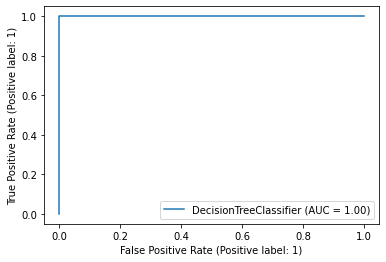

In [27]:
from sklearn.tree import DecisionTreeClassifier;

dt = DecisionTreeClassifier();
dt.fit(X_train,y_train)

evaluate_model(dt)

### Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        16

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[44  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Training score: 1.0
Test score: 1.0


C:\Users\Lorenz Angelo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


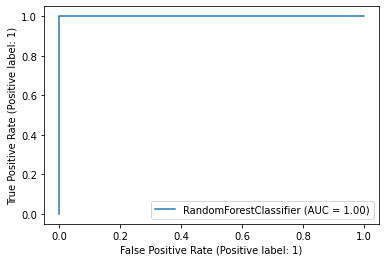

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier();
rf.fit(X_train,y_train);

evaluate_model(rf)

### KNN Classifier

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.87      0.81      0.84        16

    accuracy                           0.92        60
   macro avg       0.90      0.88      0.89        60
weighted avg       0.92      0.92      0.92        60

[[42  2  0  0  0]
 [ 3 13  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Training score: 0.9571428571428572
Test score: 0.9166666666666666


C:\Users\Lorenz Angelo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


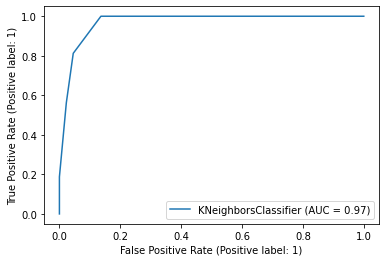

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier();
knn.fit(X_train,y_train);

evaluate_model(knn)

### Logistic Regression

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        44
           1       1.00      0.50      0.67        16

    accuracy                           0.87        60
   macro avg       0.92      0.75      0.79        60
weighted avg       0.89      0.87      0.85        60

[[44  0  0  0  0]
 [ 8  8  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Training score: 0.9142857142857143
Test score: 0.8666666666666667


C:\Users\Lorenz Angelo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


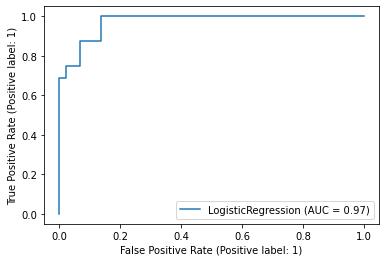

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression();
lr.fit(X_train,y_train);

evaluate_model(lr)

### Hyperparameter Tuning / Cross Validation
Tuning our model into a better model

In [31]:
from sklearn.model_selection import RandomizedSearchCV

####  Decision Tree Classifier Hyperparameter Tuning

In [32]:
params = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth': [5,10,15,20]
}

rsearch = RandomizedSearchCV(DecisionTreeClassifier(), params, 
n_iter = 15, cv=10)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'splitter': ['best', 'random']})

In [33]:
rsearch.best_params_

{'splitter': 'best', 'max_depth': 10, 'criterion': 'entropy'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        16

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[44  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Training score: 1.0
Test score: 1.0


C:\Users\Lorenz Angelo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


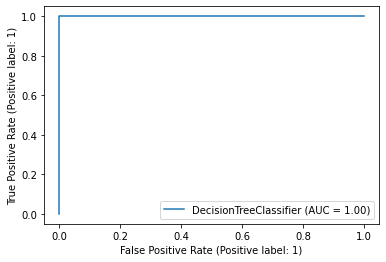

In [34]:
dt_tuned = DecisionTreeClassifier(
    splitter='best',
    max_depth=10,
    criterion="entropy"
);

dt_tuned.fit(X_train,y_train);
evaluate_model(dt_tuned)

##### Since the cross validation score of models who gained 100% accuracy in both training and test dataset is still 100%, we can conclude that the best models for this data is either DecisionTree or Random Forest.